In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['zomato.csv']


READING DATA 

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df=pd.read_csv('../input/zomato.csv')

In [43]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


**DATA PREPROCESSING**
* Checking data types and converting to desired data types.
* Checking for null values.
* Check for outlying characters


In [44]:
##Lets take a look at the data
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

As you can see the data type needs to be changed for the numerical data types to float. 

In [45]:
# Check for Null data
for i in df.columns:
    print(df[i].isnull().value_counts())
    

False    51717
Name: url, dtype: int64
False    51717
Name: address, dtype: int64
False    51717
Name: name, dtype: int64
False    51717
Name: online_order, dtype: int64
False    51717
Name: book_table, dtype: int64
False    43942
True      7775
Name: rate, dtype: int64
False    51717
Name: votes, dtype: int64
False    50509
True      1208
Name: phone, dtype: int64
False    51696
True        21
Name: location, dtype: int64
False    51490
True       227
Name: rest_type, dtype: int64
True     28078
False    23639
Name: dish_liked, dtype: int64
False    51672
True        45
Name: cuisines, dtype: int64
False    51371
True       346
Name: approx_cost(for two people), dtype: int64
False    51717
Name: reviews_list, dtype: int64
False    51717
Name: menu_item, dtype: int64
False    51717
Name: listed_in(type), dtype: int64
False    51717
Name: listed_in(city), dtype: int64


In [46]:
##easy way to check for null values
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

#df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(float)
#When you directly try to convert the column to float by running the above code you will get the error (could not convert string to float: '1,200')
#You get this error since some values contain ',' characters which cannot be converted to float
#To avoid this you need to convert to string first then get rid of ','.Then convert back to float.YOLO!


In [47]:
#First converting to string and then replacing the ',' term .
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(str)
df['approx_cost(for two people)']=df['approx_cost(for two people)'].apply(lambda x: x.replace(',', '.'))

In [48]:
#Now finally converting the column to float format as desired.
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(float)
df['approx_cost(for two people)'].dtype
df['approx_cost(for two people)'].isnull().value_counts()


False    51371
True       346
Name: approx_cost(for two people), dtype: int64

In [49]:
#df['rate_transformed'] = df['rate'].astype(float)
##you will get the same error as above so now go ahead and do the same thing by replacing into str first and then float.

In [50]:
df['rate_transformed'] = df['rate'].astype(str)
df['rate_transformed'] = df['rate_transformed'].apply(lambda x: x.split('/')[0])
df['rate_transformed'] = df['rate_transformed'].apply(lambda x: x.replace('NEW', str(np.nan)))
df['rate_transformed'] = df['rate_transformed'].apply(lambda x: x.replace('-', str(np.nan)))
df['rate_transformed'] = df['rate_transformed'].astype(float)

In [51]:
##droping the NAN values
df.dropna(subset=['rate_transformed', 'approx_cost(for two people)'], inplace=True)


In [52]:
#drop columns that are not required.
df.isnull().sum()
df.drop(['rate','url','phone'],axis=1,inplace=True)
df.head()

,address,name,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rate_transformed
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8


**DATA VISUALIZATION AND ANALYSIS**

EXPLORATORY DATA ANALYSIS FOR
1. TOP 15 restaurants in Bangalore.
2. Plotting the barplot as well as the line plot for the highest cost and rating accordingly.
3. Plotting Online Order and Book Table options across restaurants.
4. AVERAGE COST AND RATINGS OF THE RESTAURANTS BY CITY
5. AVERAGE COST AND RATINGS OF THE RESTAURANTS BY isted_in(type): Buffet,caffe,deserts[](http://)
6. TOP TEN MOST PREFFERED CUISINES IN BANGLORE


In [53]:
##grouping the required data for further analysis(group by names)
highplot=df.groupby('name',as_index=False)['rate_transformed'].mean()
highplot.head()

,name,rate_transformed
0,#FeelTheROLL,3.4
1,#L-81 Cafe,3.9
2,#refuel,3.7
3,1000 B.C,3.2
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.7


In [54]:
## using iloc funtion to get the top 15 restaurants after sorting the values in descending order.
Top_15=highplot.sort_values(by='rate_transformed',ascending=False).iloc[:15]
Top_15.head()

,name,rate_transformed
426,Asia Kitchen By Mainland China,4.900000
4943,SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,4.900000
950,Byg Brewski Brewing Company,4.900000
4494,Punjab Grill,4.871429
631,Belgian Waffle Factory,4.844828


In [55]:
###changing the name of the second restaurant as seen above in the second row
Top_15.iloc[1,0]='Spa_Cuisine'


<bound method Axes.plot of <matplotlib.axes._subplots.AxesSubplot object at 0x7fdc5f2c54e0>>

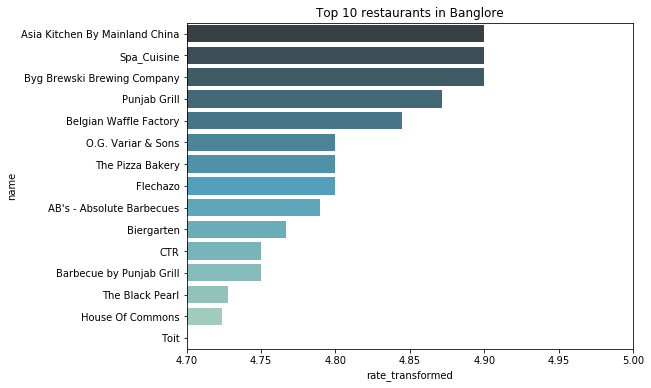

In [56]:
#Plotting the restaurants with the hishest ratings.
fig,ax =plt.subplots(figsize=(8,6))
sns.barplot(y='name',x='rate_transformed',data=Top_15,ax=ax,palette='GnBu_d')
ax.set_xlim([4.7,5])
ax.set_title('Top 10 restaurants in Banglore')
ax.plot


Plotting restaurants by highest cost and ratings 

In [57]:
Grouping_for_analysis=df.groupby('name',as_index=False).mean()

In [58]:
high_cost = Grouping_for_analysis.sort_values(by='approx_cost(for two people)', 
                                     ascending=False).iloc[:10, np.r_[0, -1, -2]]

high_cost.head()

,name,rate_transformed,approx_cost(for two people)
1879,Engine,3.300,950.0
454,Ayda Persian Kitchen,3.850,950.0
6018,The Onyx - The HHI Select Bengaluru,3.325,950.0
604,Bathinda Dine,4.030,950.0
2697,Inchara,3.700,950.0


Text(0.5, 0, '')

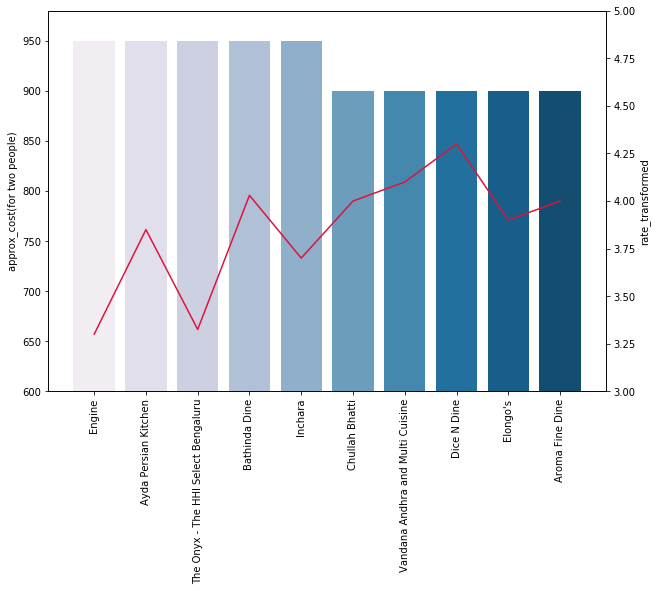

In [59]:
##Plotting the barplot as well as the line plot for the highest cost and rating accordingly
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(x='name', y='approx_cost(for two people)', data=high_cost, ax=ax, palette='PuBu')
ax2 = ax.twinx()###create copy of the axis on the other side
sns.lineplot(x='name', y='rate_transformed', data=high_cost, ax=ax2, color='crimson', sort=False)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(600, 980)
ax2.set_ylim([3, 5])

ax.xaxis.set_label_text("")

Text(0.5, 0, '')

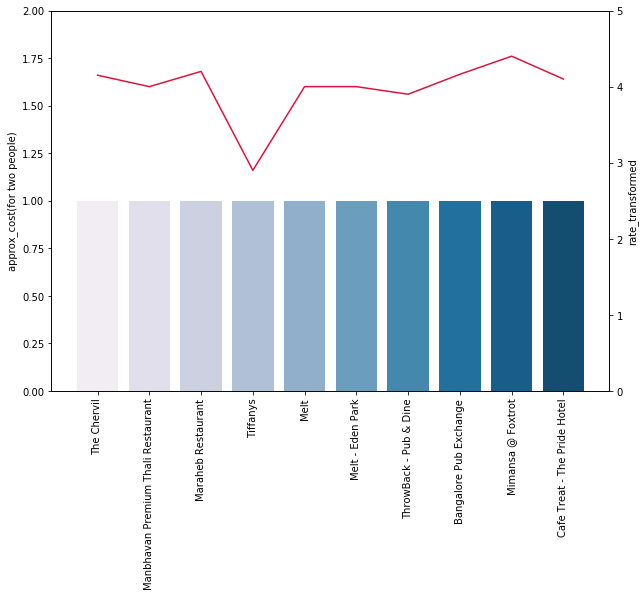

In [60]:
low_cost = Grouping_for_analysis.sort_values(by='approx_cost(for two people)', 
                                     ascending=True).iloc[:10, np.r_[0, -1, -2]]
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(x='name', y='approx_cost(for two people)', data=low_cost, ax=ax, palette='PuBu')
ax2 = ax.twinx()
sns.lineplot(x='name', y='rate_transformed', data=low_cost, ax=ax2, color='crimson', sort=False)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim([0, 2])
ax2.set_ylim([0, 5])
ax.xaxis.set_label_text("")


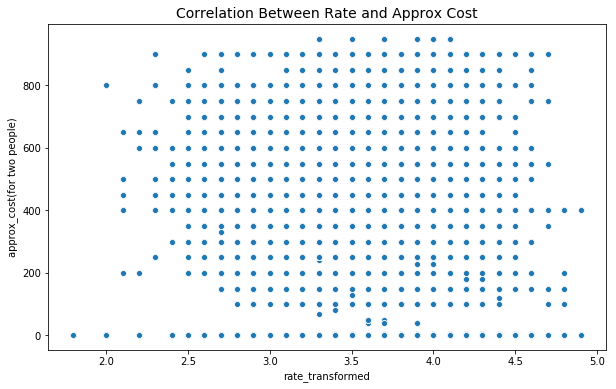

In [61]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='rate_transformed', y='approx_cost(for two people)', data=df, ax=ax)
ax.set_title('Correlation Between Rate and Approx Cost', size=14)
plt.show()

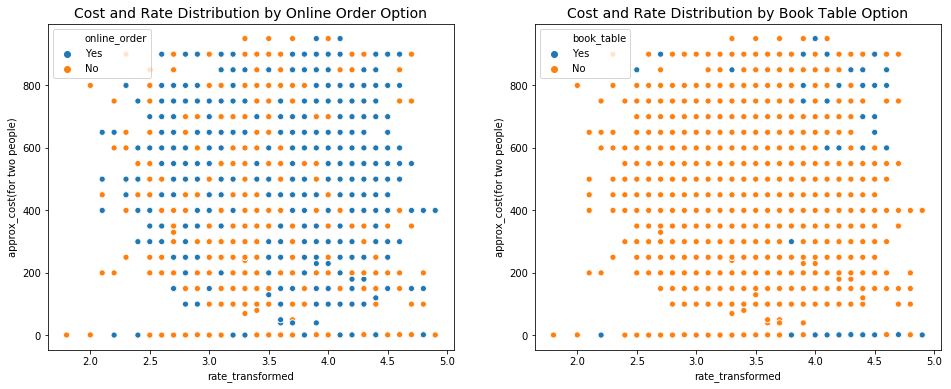

In [62]:
# Separating by Online Order and Book Table options
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.scatterplot(x='rate_transformed', y='approx_cost(for two people)', hue='online_order', 
                data=df, ax=axs[0])
sns.scatterplot(x='rate_transformed', y='approx_cost(for two people)', hue='book_table', 
                data=df, ax=axs[1])
axs[0].set_title('Cost and Rate Distribution by Online Order Option', size=14)
axs[1].set_title('Cost and Rate Distribution by Book Table Option', size=14)
plt.show()

Extract: It can be observed from the above graphs that nothing significant can be observed from the online_order scatter plot.
But from the Book_table option we can see that book_table option is mostly available or concetrated with restaurants with higher approx_cost(for two people) and higher ratings. While this service is less likely to be available for low cost or low rating restaurants

AVERAGE COST AND RATINGS OF THE RESTAURANTS BY CITY

In [81]:
grouping_fot_AVG=df.groupby(['listed_in(city)'],as_index=False).mean().sort_values(by='rate_transformed',ascending=False)
grouping_fot_AVG['listed_in(city)'].value_counts()

Jayanagar                1
MG Road                  1
Basavanagudi             1
Koramangala 5th Block    1
Electronic City          1
Old Airport Road         1
Sarjapur Road            1
Koramangala 6th Block    1
JP Nagar                 1
Bellandur                1
Frazer Town              1
Malleshwaram             1
Brookefield              1
Banashankari             1
Indiranagar              1
HSR                      1
Whitefield               1
Koramangala 7th Block    1
BTM                      1
Brigade Road             1
Lavelle Road             1
Marathahalli             1
Bannerghatta Road        1
Rajajinagar              1
Koramangala 4th Block    1
New BEL Road             1
Kammanahalli             1
Kalyan Nagar             1
Church Street            1
Residency Road           1
Name: listed_in(city), dtype: int64

In [82]:
grouping_fot_AVG.head()

,listed_in(city),votes,approx_cost(for two people),rate_transformed
7,Church Street,452.349144,301.271904,3.802635
5,Brigade Road,437.238705,305.119656,3.801146
21,MG Road,475.139274,307.361881,3.800132
27,Residency Road,436.196283,306.356766,3.779182
20,Lavelle Road,401.294280,308.765024,3.775396


In [83]:
grouping_fot_AVG['approx_cost(for two people)'].max()

426.9592184368739

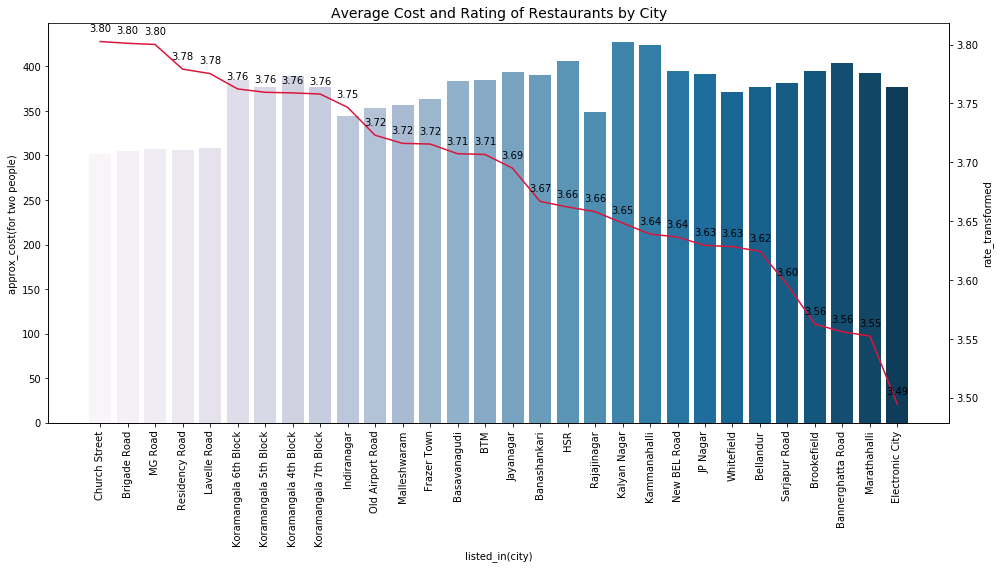

In [84]:
fig,ax=plt.subplots(figsize=(14,8))
ax=sns.barplot(y='approx_cost(for two people)',x='listed_in(city)',data=grouping_fot_AVG,ax=ax,palette='PuBu')
ax2=ax.twinx()
#ax.set_ylim([200,700])
ax2=sns.lineplot(y='rate_transformed',x='listed_in(city)',data=grouping_fot_AVG,ax=ax2,color='crimson',sort=False)
#ax2.set_ylim([3,5])
ax.tick_params(axis='x', labelrotation=90)

xs = np.arange(0,len(grouping_fot_AVG),1)
ys = grouping_fot_AVG['rate_transformed']
ax.spines['top'].set_visible(False)
for x,y in zip(xs,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color='black')

ax.set_title('Average Cost and Rating of Restaurants by City', size=14)
plt.tight_layout()

Average Cost and Rating of Restaurants by listed_in(type)

In [85]:
#By rest_type
grouping_fot_AVG_by_rest_type=df.groupby(['listed_in(type)'],as_index=False).mean().sort_values(by='rate_transformed',ascending=False)

In [86]:
grouping_fot_AVG_by_rest_type['listed_in(type)'].value_counts()

Desserts              1
Buffet                1
Cafes                 1
Dine-out              1
Delivery              1
Pubs and bars         1
Drinks & nightlife    1
Name: listed_in(type), dtype: int64

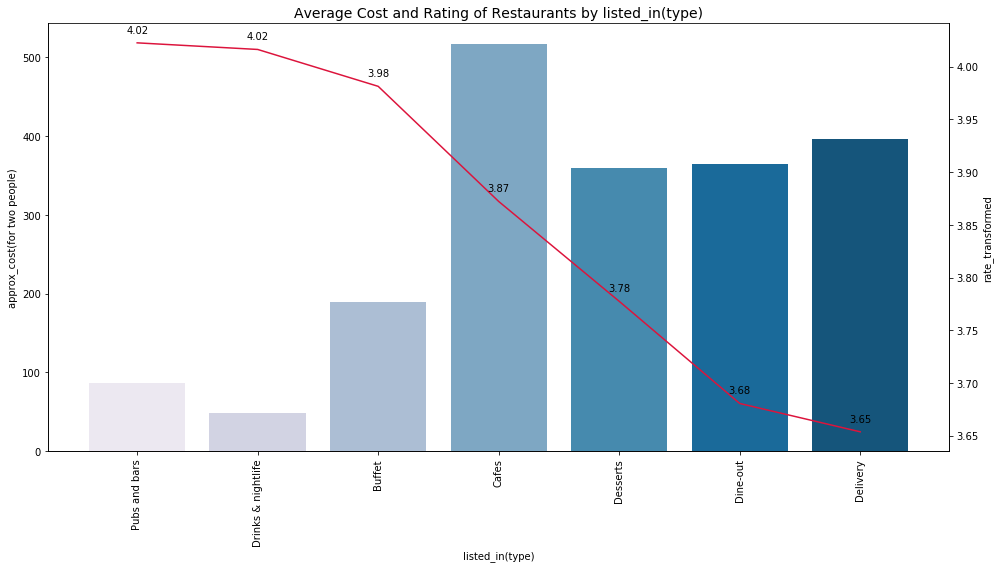

In [69]:
fig,ax=plt.subplots(figsize=(14,8))
ax=sns.barplot(y='approx_cost(for two people)',x='listed_in(type)',data=grouping_fot_AVG_by_rest_type,ax=ax,palette='PuBu')
ax2=ax.twinx()
#ax.set_ylim([200,700])
ax2=sns.lineplot(y='rate_transformed',x='listed_in(type)',data=grouping_fot_AVG_by_rest_type,ax=ax2,color='crimson',sort=False)
#ax2.set_ylim([3,5])
ax.tick_params(axis='x', labelrotation=90)

xs = np.arange(0,len(grouping_fot_AVG_by_rest_type),1)
ys = grouping_fot_AVG_by_rest_type['rate_transformed']
ax.spines['top'].set_visible(False)
for x,y in zip(xs,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color='black')

ax.set_title('Average Cost and Rating of Restaurants by listed_in(type)', size=14)
plt.tight_layout()

In [70]:
df.head()

,address,name,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rate_transformed
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8


TOP TEN MOST PREFFERED CUISINES IN BANGLORE

In [71]:
TOP_preferred_cuisines=df['cuisines'].value_counts().iloc[:10]
print("TOP TEN MOST PREFFERED CUISINES IN BANGLORE")
print(TOP_preferred_cuisines)

TOP TEN MOST PREFFERED CUISINES IN BANGLORE
North Indian                           2118
North Indian, Chinese                  1975
South Indian                           1232
Cafe                                    620
Bakery, Desserts                        613
Biryani                                 609
South Indian, North Indian, Chinese     561
Desserts                                545
Fast Food                               514
Chinese                                 410
Name: cuisines, dtype: int64


In [72]:
#percent of restaurants with online orders
group=df.groupby(['online_order']).count()

In [73]:
group

,address,name,book_table,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rate_transformed
online_order,,,,,,,,,,,,,,
No,14212,14212,14212,14212,14212,14161,6898,14212,14212,14212,14212,14212,14212,14212
Yes,27206,27206,27206,27206,27206,27110,16429,27198,27206,27206,27206,27206,27206,27206


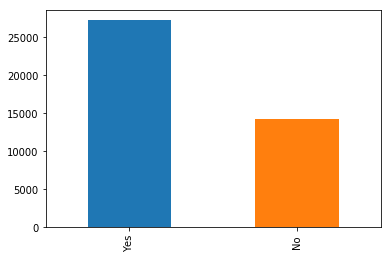

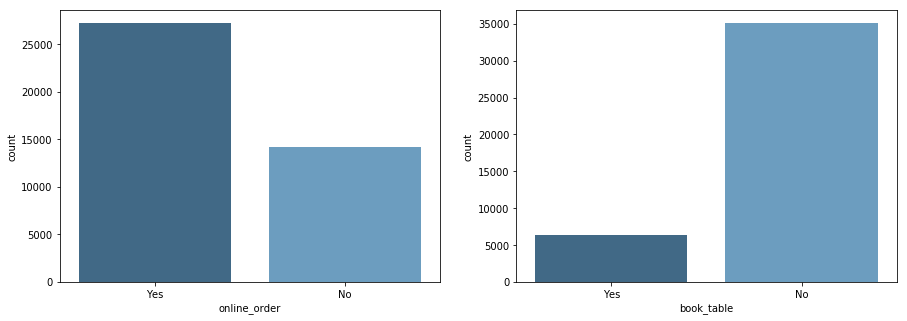

In [74]:
df['online_order'].value_counts().plot(kind='bar')#
#or use the code below using seaborn.
fig, axs = plt.subplots(1, 2,figsize=(15, 5))
sns.countplot(x='online_order', data=df, ax=axs[0], palette='Blues_d')
sns.countplot(x='book_table', data=df, ax=axs[1], palette='Blues_d')

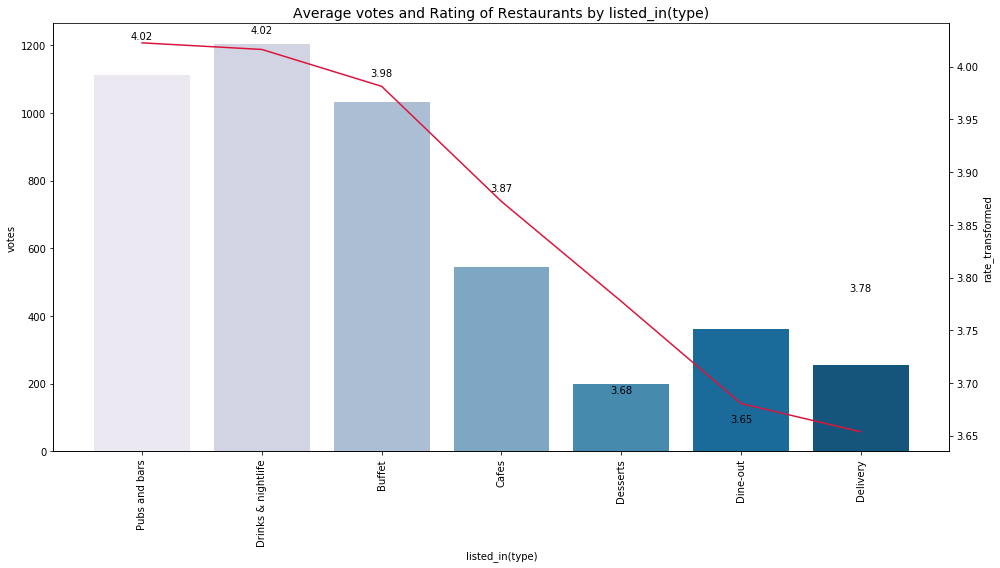

In [75]:
grouping_trial=df.groupby(['listed_in(type)'],as_index=False).mean().sort_values(by='votes',ascending=False)
fig,ax=plt.subplots(figsize=(14,8))
ax=sns.barplot(y='votes',x='listed_in(type)',data=grouping_fot_AVG_by_rest_type,ax=ax,palette='PuBu')
ax2=ax.twinx()
#ax.set_ylim([200,700])
ax2=sns.lineplot(y='rate_transformed',x='listed_in(type)',data=grouping_fot_AVG_by_rest_type,ax=ax2,color='crimson',sort=False)
#ax2.set_ylim([3,5])
ax.tick_params(axis='x', labelrotation=90)

xs = np.arange(0,len(grouping_trial),1)
ys = grouping_trial['rate_transformed']
ax.spines['top'].set_visible(False)
for x,y in zip(xs,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color='black')

ax.set_title('Average votes and Rating of Restaurants by listed_in(type)', size=14)
plt.tight_layout()

In [76]:
#TOP 10 restaurants in banglore compared with ratings and price.
final_group=df.groupby(['name'],as_index=False).mean().sort_values(by='rate_transformed',ascending=False).iloc[:10]

In [77]:
final_group.head()

,name,votes,approx_cost(for two people),rate_transformed
426,Asia Kitchen By Mainland China,2224.894737,1.5,4.900000
4943,SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,246.000000,1.0,4.900000
950,Byg Brewski Brewing Company,16588.500000,1.6,4.900000
4494,Punjab Grill,1380.000000,2.0,4.871429
631,Belgian Waffle Factory,858.000000,400.0,4.844828


In [78]:
final_group.iloc[1,0]='Spa Cuisine'
final_group.head()

,name,votes,approx_cost(for two people),rate_transformed
426,Asia Kitchen By Mainland China,2224.894737,1.5,4.900000
4943,Spa Cuisine,246.000000,1.0,4.900000
950,Byg Brewski Brewing Company,16588.500000,1.6,4.900000
4494,Punjab Grill,1380.000000,2.0,4.871429
631,Belgian Waffle Factory,858.000000,400.0,4.844828


In [79]:
final_group['approx_cost(for two people)']

426       1.500000
4943      1.000000
950       1.600000
4494      2.000000
631     400.000000
4148    200.000000
6042      1.200000
1998      1.400000
93        1.568421
709       2.200000
Name: approx_cost(for two people), dtype: float64

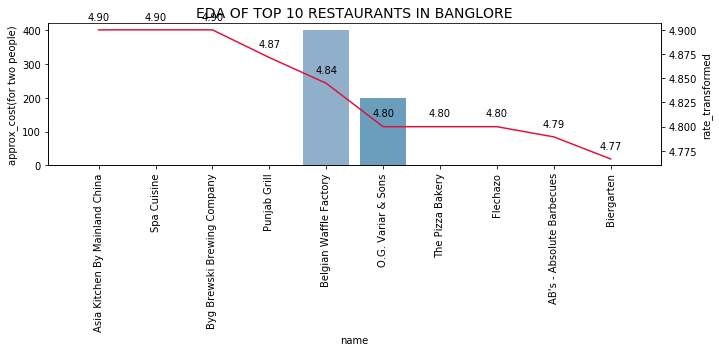

In [80]:
fig,ax=plt.subplots(figsize=(10,5))
ax=sns.barplot(y='approx_cost(for two people)',x='name',data=final_group,ax=ax,palette='PuBu')
ax2=ax.twinx()
#ax.set_ylim([200,700])
ax2=sns.lineplot(y='rate_transformed',x='name',data=final_group,ax=ax2,color='crimson',sort=False)
#ax2.set_ylim([3,5])
ax.tick_params(axis='x', labelrotation=90)

xs = np.arange(0,len(final_group),1)
ys = final_group['rate_transformed']
ax.spines['top'].set_visible(False)
for x,y in zip(xs,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color='black')

ax.set_title('EDA OF TOP 10 RESTAURANTS IN BANGLORE', size=14)
plt.tight_layout()